In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandasql as ps

# 1. Number of direct links probability by month

#### Read data and count by month and no_of_direct_links

In [2]:
count_direct_links_by_month_as = pd.read_csv('datasets/count-direct-links-by-month-as.csv')
count_direct_links_by_month_as['date'] = pd.to_datetime(count_direct_links_by_month_as['date'], format='%Y%m%d')
count_direct_links_by_month_as['date'] = count_direct_links_by_month_as['date'].dt.date
count_direct_links_by_month_as = count_direct_links_by_month_as.groupby(['date', 'noOfDirectLinks']).count().rename(columns={'fromAS': 'count'})
count_direct_links_by_month_as.head()

count
date       noOfDirectLinks       
2016-09-09 1                 2558
           2                  875
           3                  501
           4                  275
           5                  182

#### Calculate the probability of having a number of direct links by month

In [3]:
cdf_direct_links_by_month = count_direct_links_by_month_as.groupby(level=0).apply(lambda x : x.cumsum() / float(x.sum())).rename(columns={'count':'cdf'})
cdf_direct_links_by_month.head()

cdf
date       noOfDirectLinks          
2016-09-09 1                0.462651
           2                0.620908
           3                0.711521
           4                0.761259
           5                0.794176

In [4]:
cdf_direct_links_by_month = cdf_direct_links_by_month.query('noOfDirectLinks < 70')
cdf_direct_links_by_month = cdf_direct_links_by_month.reset_index().groupby(['date'])

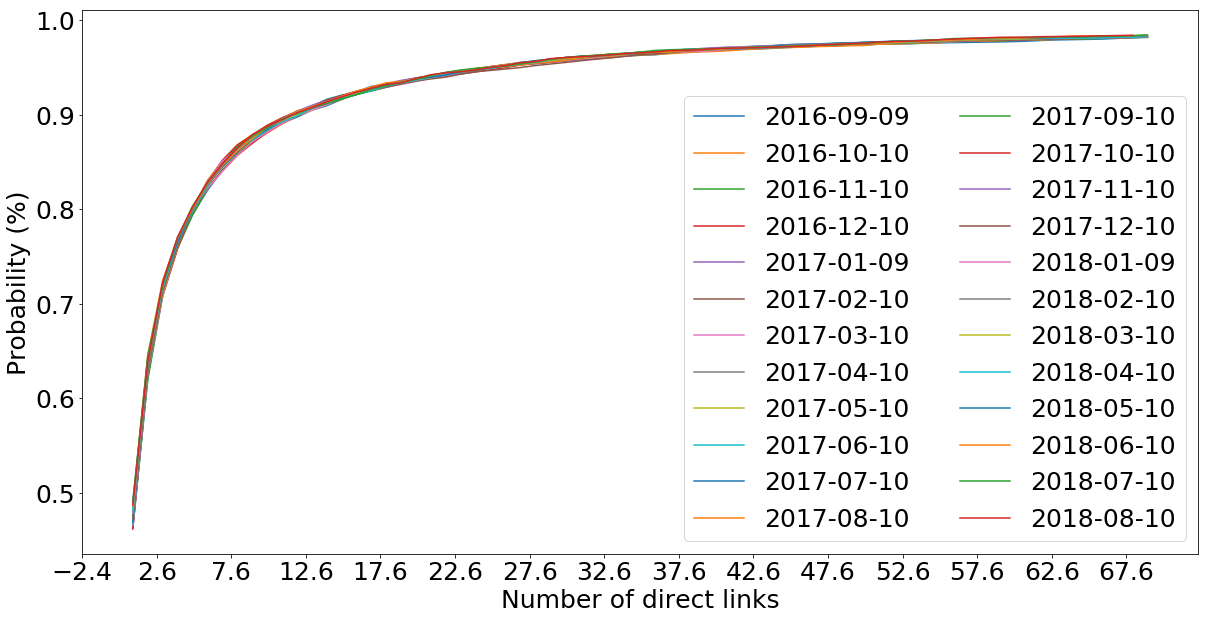

In [6]:
fig, ax = plt.subplots()
x_ticks = np.arange(0, 70)
for key, grp in cdf_direct_links_by_month:
    ax = grp.plot(ax=ax, kind='line', x='noOfDirectLinks', y='cdf', label=key, figsize=(20, 10))

ax.set_xticks(x_ticks)

ax.set_xlabel('Number of direct links', fontsize=25)

start, end = ax.get_xlim()

ax.xaxis.set_ticks(np.arange(start, end, 5.0))

ax.set_ylabel('Probability (%)', fontsize=25)

plt.tick_params(axis='both', which='major', labelsize=25)

plt.legend(loc='best', prop={'size': 25}, ncol=2)

plt.savefig('cdf_direct_links_by_month.pdf')
plt.show()

# 2. Number of indirect links probability by month

In [7]:
count_indirect_links_by_month_as = pd.read_csv('datasets/count-indirect-links-by-month-as.csv')
count_indirect_links_by_month_as['date'] = pd.to_datetime(count_indirect_links_by_month_as['date'], format='%Y%m%d')
count_indirect_links_by_month_as['date'] = count_indirect_links_by_month_as['date'].dt.date
count_indirect_links_by_month_as = count_indirect_links_by_month_as.groupby(['date', 'noOfIndirectLinks']).count().rename(columns={'fromAS': 'count'})
count_indirect_links_by_month_as.head()

count
date       noOfIndirectLinks       
2016-09-09 1                   1044
           2                    388
           3                    207
           4                    130
           5                     94

In [8]:
cdf_indirect_links_by_month = count_indirect_links_by_month_as.groupby(level=0).apply(lambda x : x.cumsum() / float(x.sum())).rename(columns={'count':'cdf'})
cdf_indirect_links_by_month.head()

cdf
date       noOfIndirectLinks          
2016-09-09 1                  0.448261
           2                  0.614856
           3                  0.703736
           4                  0.759553
           5                  0.799914

In [9]:
cdf_indirect_links_by_month = cdf_indirect_links_by_month.query('noOfIndirectLinks < 70')
cdf_indirect_links_by_month  = cdf_indirect_links_by_month.reset_index().groupby(['date'])

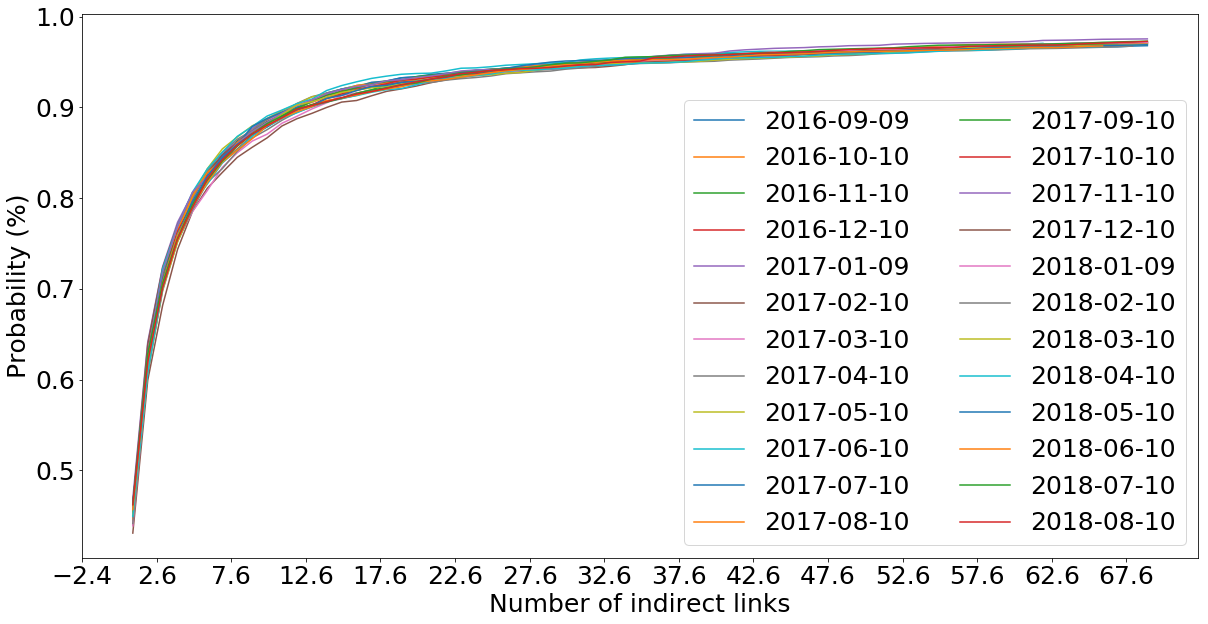

In [10]:
fig, ax = plt.subplots()
x_ticks = np.arange(0, 70)
for key, grp in cdf_indirect_links_by_month:
    ax = grp.plot(ax=ax, kind='line', x='noOfIndirectLinks', y='cdf', label=key, figsize=(20,10))

ax.set_xticks(x_ticks)

ax.set_xlabel('Number of indirect links', fontsize=25)

start, end = ax.get_xlim()

ax.xaxis.set_ticks(np.arange(start, end, 5.0))

ax.set_ylabel('Probability (%)', fontsize=25)

plt.tick_params(axis='both', which='major', labelsize=25)

plt.legend(loc='best', prop={'size': 25}, ncol=2)
plt.savefig('cdf_indirect_links_by_month.pdf')
plt.show()

# 3. Number of ASes by country by month

In [11]:
count_as_by_country_month = pd.read_csv('datasets/count-as-country-by-month.csv')
count_as_by_country_month['date'] = pd.to_datetime(count_as_by_country_month['date'], format='%Y%m%d')
count_as_by_country_month['date'] = count_as_by_country_month['date'].dt.date
count_as_by_country_month.head()

date country  count
0  2018-08-10      US   6813
1  2018-07-10      US   6827
2  2018-06-10      US   6846
3  2018-05-10      US   6785
4  2018-04-10      US   6835

In [12]:
count_as_by_country_month = count_as_by_country_month.groupby(['country'])

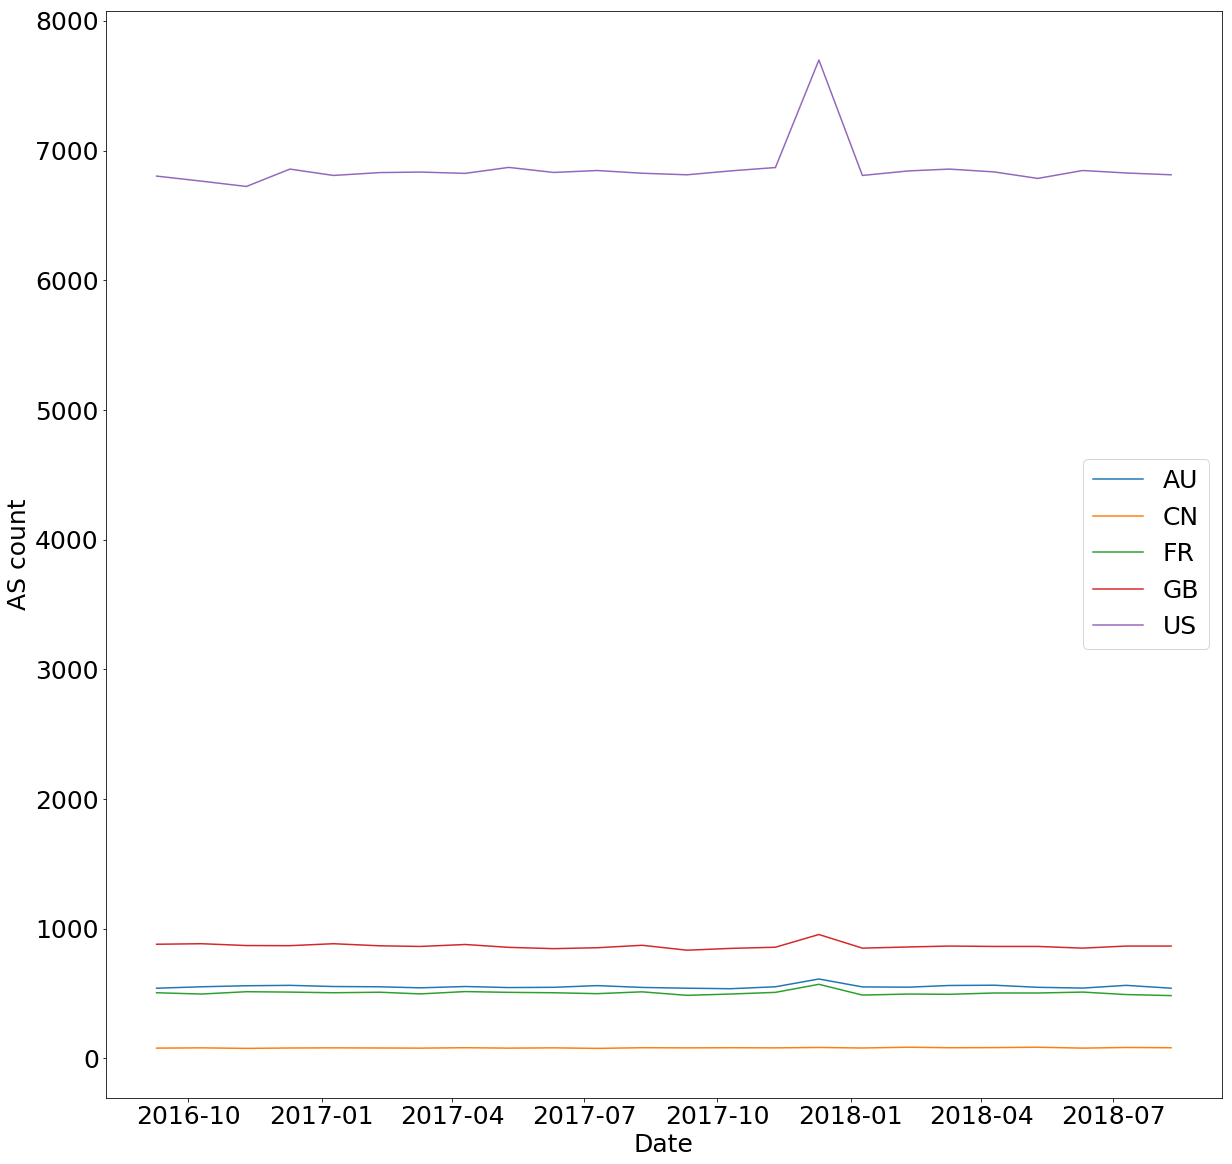

In [14]:
fig, ax = plt.subplots()

for key, grp in count_as_by_country_month:
    ax = grp.plot(ax=ax, kind='line', x='date', y='count', label=key, figsize=(20,20))

ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('AS count', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='best', prop={'size': 25})
plt.savefig('count_AS_by_country_and_month.pdf')
plt.show()

# 4. Metrics

## 4.1 Calculate the metric for month $i$ where $n$ is the number of direct links 
$$\frac{1}{n}\sum_{k=1}^n\big(\frac{|x_{i}^{k} - x_{i-1}{k}|}{x_{i-1}^{k}}\big)$$

In [15]:
count_direct_links_by_month_as = pd.read_csv('datasets/count-direct-links-by-month-as.csv')
count_direct_links_by_month_as['date'] = pd.to_datetime(count_direct_links_by_month_as['date'], format='%Y%m%d')
count_direct_links_by_month_as['date'] = count_direct_links_by_month_as['date'].dt.date
count_direct_links_by_month_as = count_direct_links_by_month_as.groupby(['date', 'noOfDirectLinks']).count().rename(columns={'fromAS': 'count'}).sort_values(['noOfDirectLinks', 'date']).reset_index()

In [16]:
count_direct_links_by_month_as.head()

date  noOfDirectLinks  count
0  2016-09-09                1   2558
1  2016-10-10                1   2581
2  2016-11-10                1   2539
3  2016-12-10                1   2510
4  2017-01-09                1   2537

In [17]:
n = 50
count_direct_links_by_month_as = count_direct_links_by_month_as.query('noOfDirectLinks <= ' + str(n))

In [18]:
query = """
SELECT df1.*, abs(df1.count - df2.count) AS diff, (abs(df1.count - df2.count) / CAST(df2.count AS REAL)) AS div  
FROM count_direct_links_by_month_as AS df1
INNER JOIN
count_direct_links_by_month_as AS df2 
ON df1.noOfDirectLinks = df2.noOfDirectLinks 
AND (
     (strftime('%Y', df1.date) = strftime('%Y', df2.date) AND strftime('%m', df1.date) - strftime('%m', df2.date) = 1) 
    OR 
     (strftime('%Y', df1.date) - strftime('%Y', df2.date) = 1 AND strftime('%m', df1.date) = '01' AND strftime('%m', df2.date) = '12')
     ) 
"""
temp1 = ps.sqldf(query, locals())
temp1.head()

date  noOfDirectLinks  count  diff       div
0  2016-10-10                1   2581    23  0.008991
1  2016-11-10                1   2539    42  0.016273
2  2016-12-10                1   2510    29  0.011422
3  2017-01-09                1   2537    27  0.010757
4  2017-02-10                1   2639   102  0.040205

##### temp1.head(100)

In [19]:
metric = temp1.groupby('date').mean().reset_index()[['date', 'div']].rename(columns={'div':'metric_value'})

In [20]:
metric.head()

date  metric_value
0  2016-10-10      0.326865
1  2016-11-10      0.302269
2  2016-12-10      0.403986
3  2017-01-09      0.488788
4  2017-02-10      0.410042

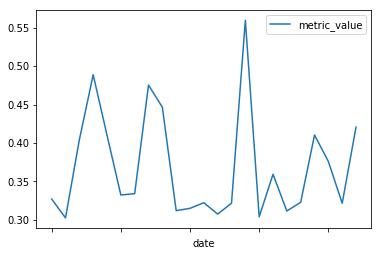

In [24]:
fig = metric.plot(x='date', y='metric_value').get_figure()
fig.savefig('metric-directlinks.pdf')

In [88]:
metric.loc[:,'metric_value'].std()

0.0709685676932115

## 4.3 Calculate variation (metric 2)


In [25]:
variation_of_number_of_AS = pd.read_csv('datasets/count-as-country-by-month.csv')
variation_of_number_of_AS['date'] = pd.to_datetime(variation_of_number_of_AS['date'], format='%Y%m%d')
variation_of_number_of_AS['date'] = variation_of_number_of_AS['date'].dt.date
variation_of_number_of_AS.head()

date country  count
0  2018-08-10      US   6813
1  2018-07-10      US   6827
2  2018-06-10      US   6846
3  2018-05-10      US   6785
4  2018-04-10      US   6835

In [31]:
mean = variation_of_number_of_AS.groupby(['country']).transform('mean').rename(columns={'count':'value'})
mean.head()

value
0  6860.5
1  6860.5
2  6860.5
3  6860.5
4  6860.5

In [33]:
variation_of_number_of_AS['metric2_value'] = np.abs(variation_of_number_of_AS['count'] - mean['value']) / mean['value']
variation_of_number_of_AS.head()

date country  count  metric2_value
0  2018-08-10      US   6813       0.006924
1  2018-07-10      US   6827       0.004883
2  2018-06-10      US   6846       0.002114
3  2018-05-10      US   6785       0.011005
4  2018-04-10      US   6835       0.003717

In [ ]:
variation_of_number_of_AS = variation_of_number_of_AS.groupby(['country'])

ValueError: too many values to unpack (expected 2)

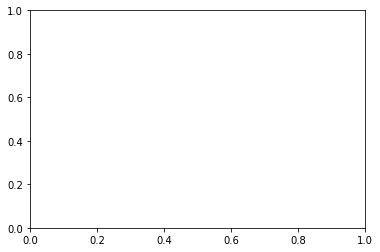

In [34]:
fig, ax = plt.subplots()

for key, grp in variation_of_number_of_AS:
    ax = grp.plot(ax=ax, kind='line', x='date', y='metric2_value', label=key, figsize=(20,20))

ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Variation', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='best', prop={'size': 25})
plt.savefig('Variation_of_number_of_AS.pdf')
plt.show()